### Import Basic Languages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
#pip install --trusted-host files.pythonhosted.org --trusted-host pypi.org --trusted-host pypi.python.org jupyterthemes

In [3]:
#!jt -r

In [4]:
import sys
from termcolor import colored

import warnings
warnings.filterwarnings("ignore")

### Loading and reading the dataset

In [85]:
df = pd.read_csv("netflix_titles.csv", index_col = 'show_id')
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
print(colored("There are {} rows and {} columns in the dataset.".format(df.shape[0], df.shape[1]), color = 'green', on_color = 'on_magenta', attrs = ['bold']))

There are 7787 rows and 11 columns in the dataset.


<AxesSubplot:ylabel='show_id'>

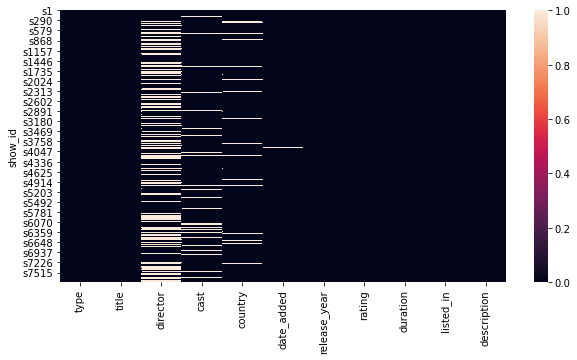

In [7]:
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull())

In [8]:
for i in df.columns:
    null_rate = df[i].isna().sum()/len(df) * 100 
    if null_rate > 0:
        print(colored("{}'s null_rate is {}".format(i, round(null_rate,2)), color = 'cyan'))

director's null_rate is 30.68
cast's null_rate is 9.22
country's null_rate is 6.51
date_added's null_rate is 0.13
rating's null_rate is 0.09


### Handling Missing Values:

In [86]:
# drop director and cast columns because of the high ratio of null values and less useful for visualization purposes
df.drop(['director'], axis = 1, inplace = True)

In [88]:
df.head()

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,
s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [89]:
# Filling all the missing values in the 'country' column with United States as Netflix was created in the USA and every show is aired on Netflix US.
df['country'].replace(np.nan, 'United States', inplace = True)

In [90]:
print(colored("I will drop the missing rows from the columns 'date_added' and 'rating' since these have only {} missing rows in total.".format(df.isnull().sum().sum()),
             color = 'green', attrs = ['bold']))

I will drop the missing rows from the columns 'date_added' and 'rating' since these have only 735 missing rows in total.


In [91]:
df.dropna(inplace=True)

print(colored("There are {} rows and {} columns after handling the missing records in the dataset.".format(
    df.shape[0],df.shape[1]),attrs=['bold']))

There are 7052 rows and 10 columns after handling the missing records in the dataset.


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7052 entries, s1 to s7786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7052 non-null   object
 1   title         7052 non-null   object
 2   cast          7052 non-null   object
 3   country       7052 non-null   object
 4   date_added    7052 non-null   object
 5   release_year  7052 non-null   int64 
 6   rating        7052 non-null   object
 7   duration      7052 non-null   object
 8   listed_in     7052 non-null   object
 9   description   7052 non-null   object
dtypes: int64(1), object(9)
memory usage: 606.0+ KB


#### change data type

In [93]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

# Droping the column 'date_added' as it we have seperate columns for 'year_added' and 'month_added'

df.drop('date_added',axis=1,inplace=True)

In [94]:
df.head()

,type,title,cast,country,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
show_id,,,,,,,,,,,,
s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018
s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017
s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020


### Content Type on Netflix

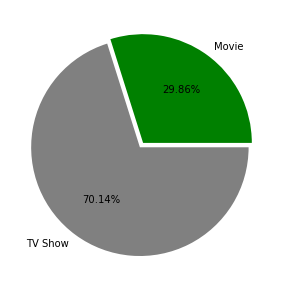

In [95]:
plt.figure(figsize = (10,5))
plt.pie(df['type'].value_counts().sort_values(),labels = df['type'].value_counts().index, explode=[0,0.05],
        autopct='%1.2f%%',colors=['Green','grey'])
plt.show()

### Top 20 Countries producing most contents

In [96]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)

In [97]:
top20Country = country_count.head(20)

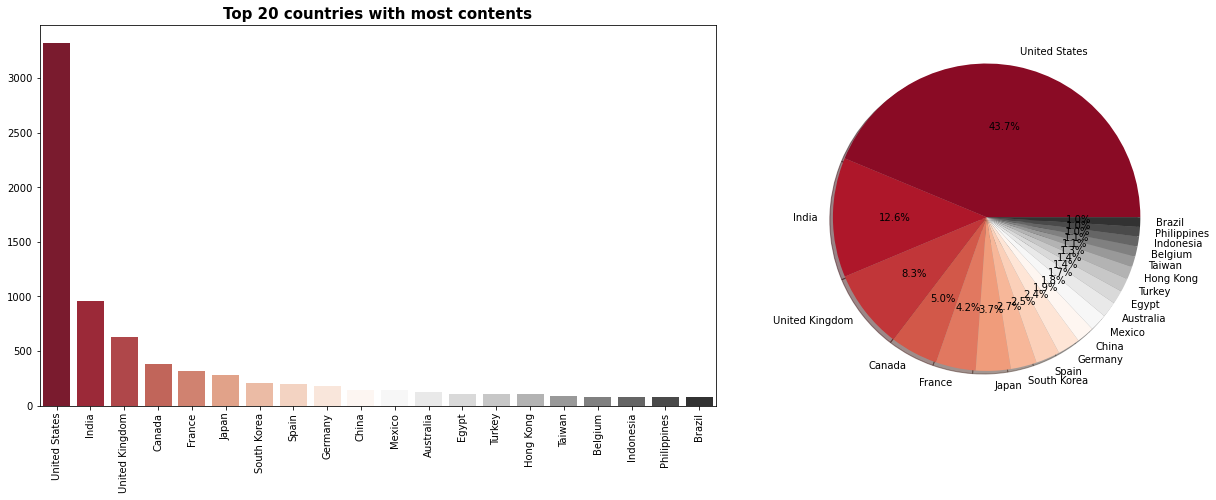

In [98]:
from matplotlib import gridspec

fig = plt.figure(figsize = (20,7))
gs = gridspec.GridSpec(nrows=1, ncols = 2, height_ratios=[6], width_ratios=[10, 5])

ax = plt.subplot(gs[0])

sns.barplot(top20Country.index, top20Country, ax=ax, palette="RdGy" )
ax.set_xticklabels(top20Country.index, rotation='90')
ax.set_title('Top 20 countries with most contents', fontsize=15, fontweight='bold')


ax2 = plt.subplot(gs[1])
ax2.pie(top20Country, labels=top20Country.index, shadow=True, startangle=0, colors=sns.color_palette("RdGy", n_colors=20),
       autopct='%1.1f%%')
ax2.axis('equal') 

plt.show() # We can see that US, India, United Kingdom, Canada and France contribute 75% of the top20 countries.

### Contents added over the year:


In [99]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

In [100]:
df_content = df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percentage'] = df_content['count'].apply(lambda x: 100* x / df_content['count'].sum())

In [101]:
df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percentage'] = df_tv1['count'].apply(lambda x: 100 * x/df_tv1['count'].sum())

In [102]:
df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {
    'year_added': 'count', 'index': 'year_added'}).sort_values('year_added')
df_movies1['percentage'] = df_movies1['count'].apply(lambda x: 100 * x/df_movies1['count'].sum())

In [103]:
t1 = go.Scatter(x = df_movies1['year_added'], y = df_movies1['count'], name = 'Movies', marker = dict(color="#a678de"))
t2 = go.Scatter(x = df_tv1['year_added'], y = df_tv1['count'], name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x = df_content['year_added'], y = df_content['count'], name = "Total Contents", marker=dict(color="brown"))

In [104]:
data= [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout = layout)
fig.show()

#Conslusion:
# 1. The growth of movies is higher than TV shows
# 2. 2018 and 2019 added more than 1200 movies for each year
# 3. The growth started in 2013

### Contents over the Month:

In [105]:
df_content = df[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_content['percentage'] = df_content['count'].apply(lambda x: 100* x/sum(df_content['count']))


df_movies2 = df_movies[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_movies2['percentage'] = df_movies2['count'].apply(lambda x: 100* x/sum(df_movies2['count']))


df_tv2 = df_tv[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_tv2['percentage'] = df_tv2['count'].apply(lambda x: 100* x/sum(df_tv2['count']))

In [106]:
h1 = go.Scatter(x = df_content['month_name_added'], y= df_content["count"], name="Total Contents", marker=dict(color="Brown"))
h2 = go.Scatter(x = df_movies2['month_name_added'], y = df_movies2['count'], name = 'Movies', marker = dict(color="#a678de"))
h3 = go.Scatter(x = df_tv2['month_name_added'], y = df_tv2['count'], name = 'TV Shows', marker = dict(color="#6ad49b"))

data2 = [h1,h2,h3]

In [107]:
layout2 = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))

fig2 = go.Figure(data2, layout = layout2)
fig2.show()


# Conclusion:
# 1. The last three months have higher growth in adding contents
# 2. Febuary has the least added number

### Genre Relationship

#### 1. Movie Genre

In [108]:
from sklearn.preprocessing import MultiLabelBinarizer 

In [109]:
def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7,
                     cbar_kws={"shrink": 0.6})
    
    plt.show()

There are 20 types in the Netflix Movie Dataset


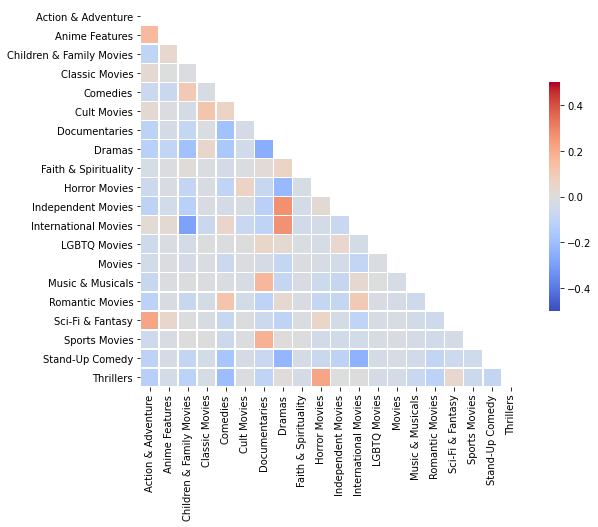

In [110]:
relation_heatmap(df_movies, 'Movie')

# The negative relationship between drama and documentary is remarkable.
# We can see that there are many dramas for independent and international films.
# And also Sci-Fi & Fantasy for action & Adventure.

There are 22 types in the Netflix TV Show Dataset


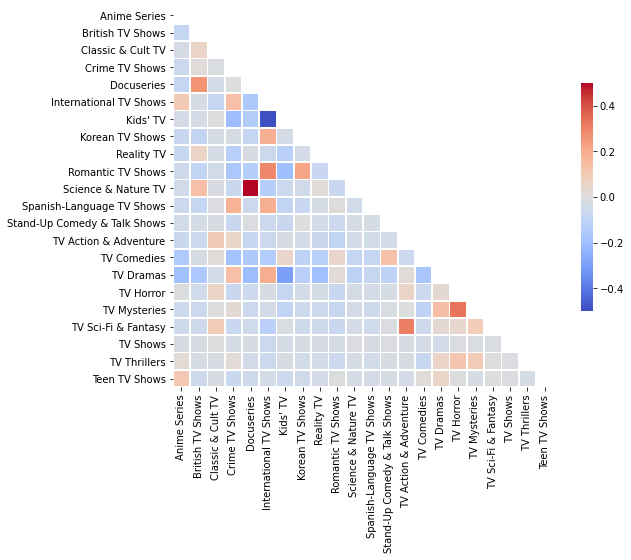

In [111]:
relation_heatmap(df_tv, 'TV Show')

# TV shows are more clearly correlated than movies.
# The negative relationship between kid's TV and International Tv Shows is remarkable.
# There is a strong positive corelation between Science & Natural and Docuseries.

### Rating Distribution

In [112]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  ['G', 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']

In [113]:
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts().reindex(index = rating_order_tv).fillna(0)

In [114]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3, 6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

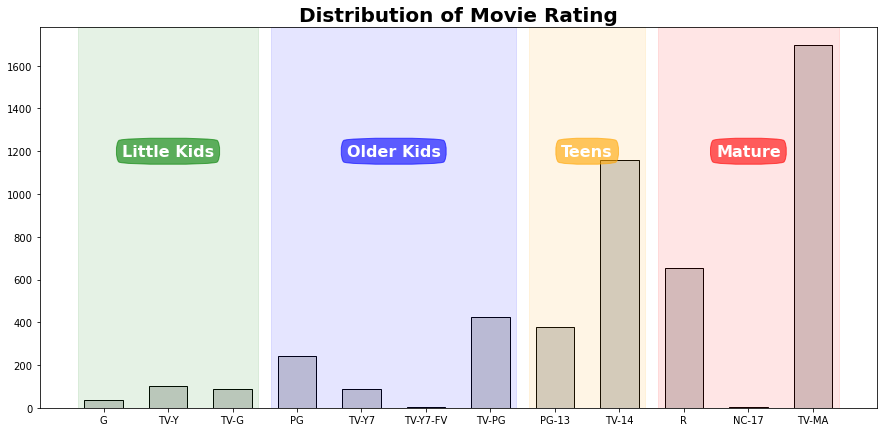

In [115]:
rating_barplot(movie_rating,'Movie', 1200)

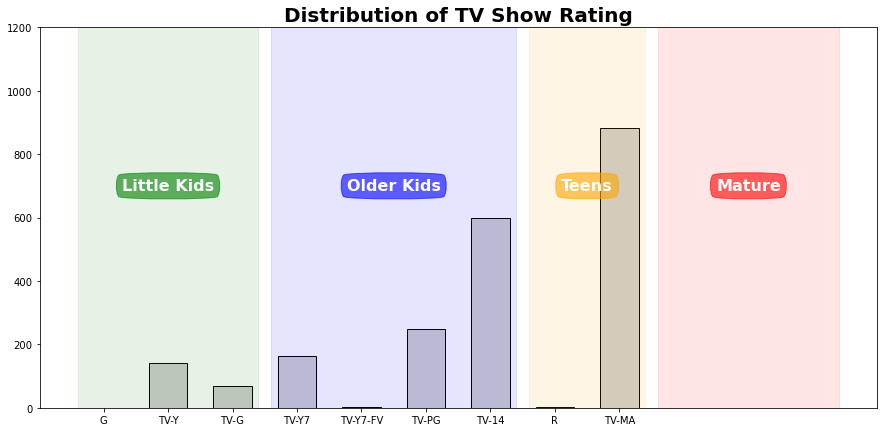

In [116]:
rating_barplot(tv_rating,'TV Show' , 700, 1200)
# From the plots we can say that the TV Show are more for young children.

### Distribution of Movie Duration:

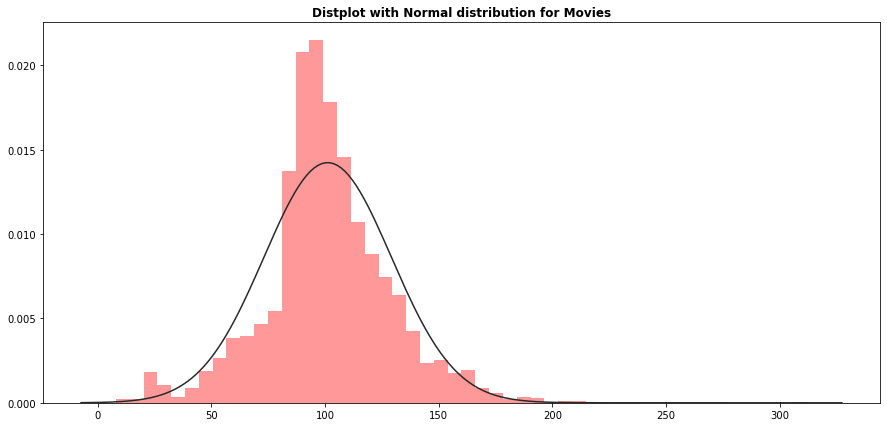

In [117]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False,color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

# From the above plot we can say that majority of the movies have duration ranging from 85 min to 120 min.

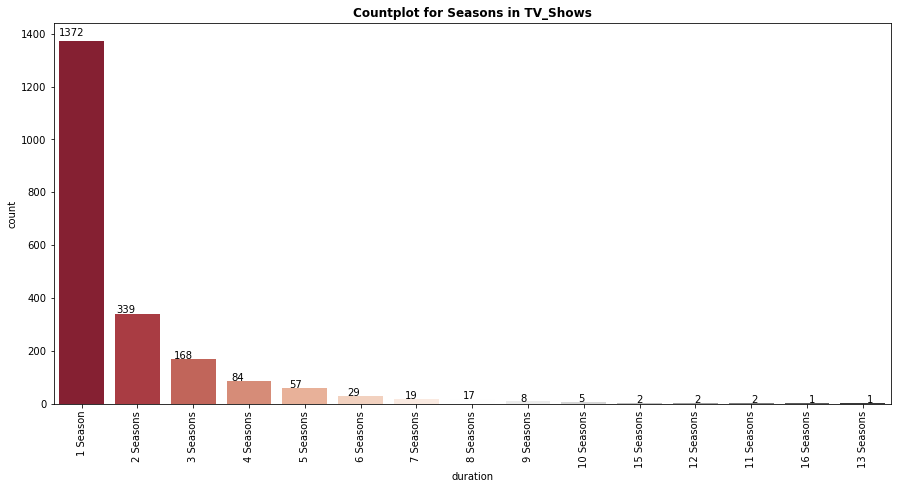

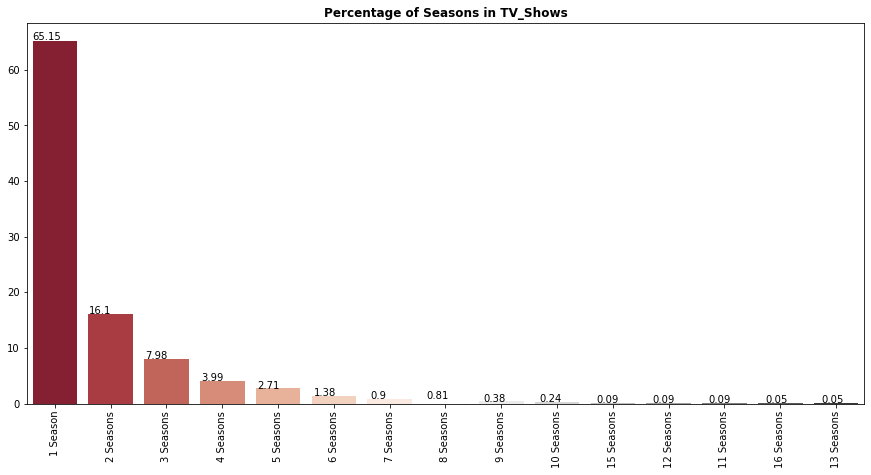

In [118]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_tv['duration'],order = df_tv['duration'].value_counts().index,palette="RdGy")
plt.title('Countplot for Seasons in TV_Shows',fontweight="bold")
plt.xticks(rotation=90)

for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.035, (p.get_height() * 1.015)))
        
        
plt.figure(figsize=(15,7))
ax = sns.barplot(x=((df_tv['duration'].value_counts()/df_tv.shape[0])*100).index,
                 y=round(((df_tv['duration'].value_counts()/df_tv.shape[0])*100),2).values,
                 palette="RdGy")
plt.title('Percentage of Seasons in TV_Shows',fontweight="bold")
plt.xticks(rotation=90)
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.01, (p.get_height() * 1.005)))
plt.show() # From the above plots we can say that 90% of the TV_Shows end by at most Season 3.

### Top10 Genre in Movies and TV Shows:

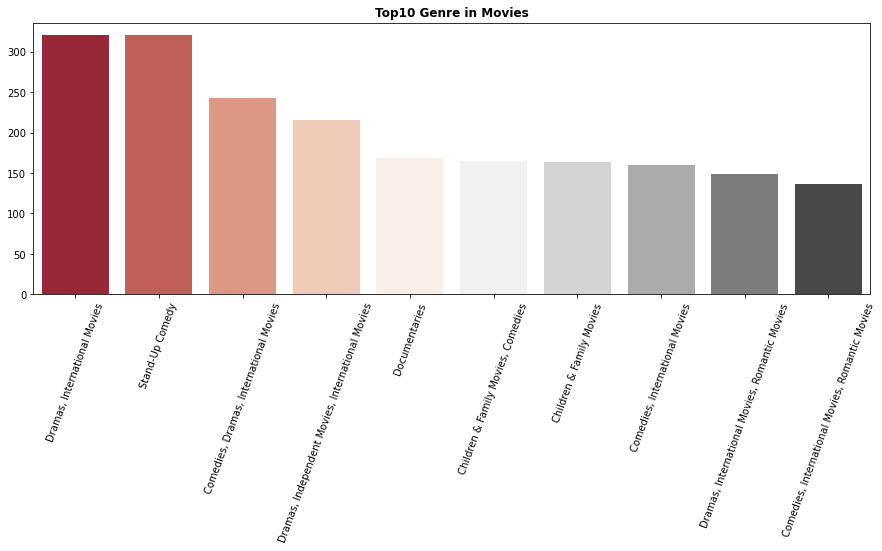

In [119]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="RdGy")
plt.xticks(rotation=70)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

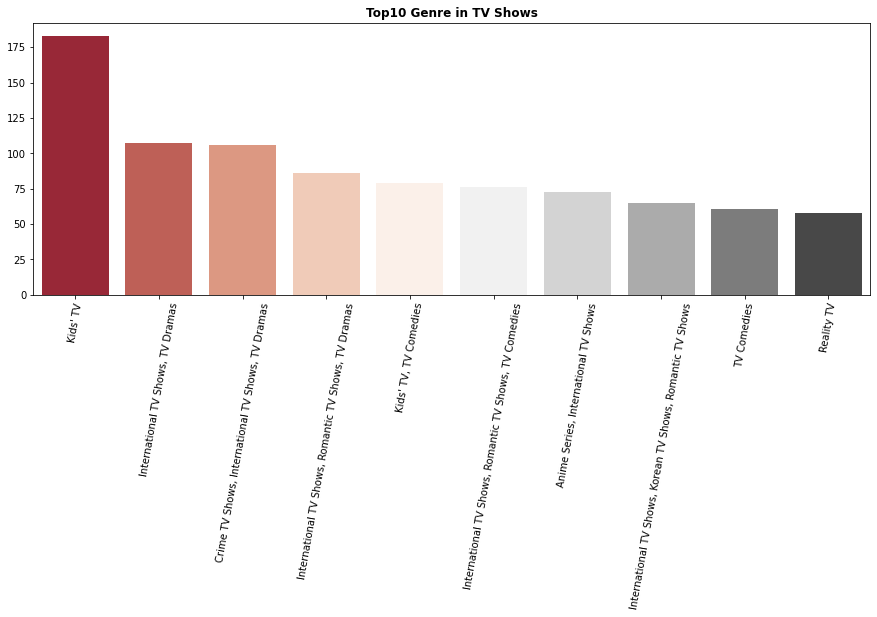

In [120]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="RdGy")
plt.xticks(rotation=80)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

### Top 20 artist present on Netflix:

In [125]:
df['cast_name'] = df['cast'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
cast_count = []
for i in df['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

In [131]:
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[:21]

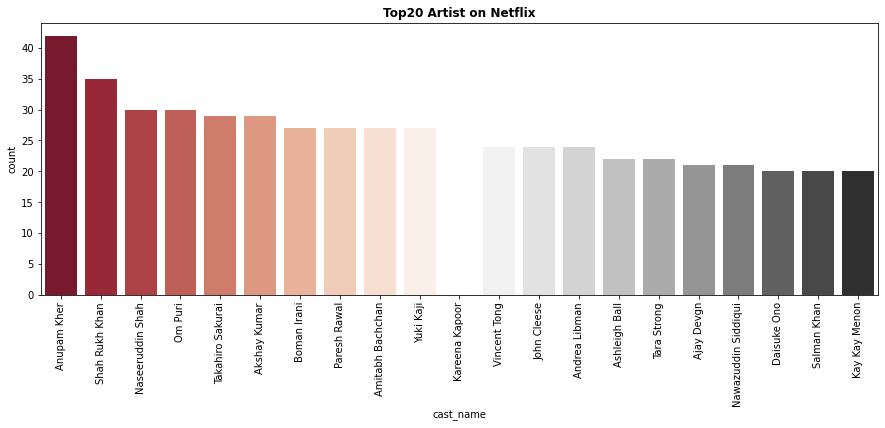

In [132]:
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="RdGy")
plt.title("Top20 Artist on Netflix",fontweight="bold")
plt.xticks(rotation=90)
plt.show()